In [ ]:
#  Git link: https://github.com/dayanaviana/WGU/tree/main/D209-Task1 

In [116]:
from platform import python_version
("Pyhton version:", python_version())

('Pyhton version:', '3.11.1')

## Imports

In [117]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PyUtils import MyPyUtils as utils
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [118]:
filePath = "churn_0_Raw.csv"
df = pd.read_csv(filePath, index_col=False)
utils.writeDFToFile(df, "df_info_0_Raw.txt")
print("DF Shape (Rows,Columns)=", df.shape)


Complete details in df_info_0_Raw.txt file
DF Shape (Rows,Columns)= (10000, 50)


# Remove features
High-dimensional data can lead to performance issues and reduce the effectiveness of distance measures (curse of dimensionality).

In [119]:
# Remove data that is too granular
df = df.drop(columns=['CaseOrder','Customer_id', 'Interaction', 'UID', 'City', 'State', 
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
print("DF Shape (Rows,Columns)=", df.shape)

DF Shape (Rows,Columns)= (10000, 30)


# Handling Missing Values
KNN is sensitive to missing data because distance calculations require complete data.

In [120]:
def checkMisisngValues():
    nullseries = df.isna().sum().sort_values()
    print("\n Null Values: ", (nullseries[nullseries > 0]))
checkMisisngValues()


 Null Values:  InternetService    2129
dtype: int64


In [121]:
print("InternetService=",df['InternetService'].unique())
df['InternetService'].describe(include='object')

InternetService= ['Fiber Optic' 'DSL' nan]


count            7871
unique              2
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [122]:
#Input missing values using the most frequent category (mode)
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)

utils.writeDFToFile(df, "df_info_1_NoMissingValues.txt")

checkMisisngValues()


Complete details in df_info_1_NoMissingValues.txt file

 Null Values:  Series([], dtype: int64)


# Feature Scaling (Normalization/Standardization)
Since KNN uses distance-based calculations, features with larger ranges can dominate the results.
Scale numeric data into [-1,1] range

In [123]:
# https://www.w3schools.com/python/python_ml_scale.asp
 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

# Select numeric features
numeric_columns_array = df.select_dtypes(include=['int64','float64']).columns.to_list()

# Scale numeric data
a_ndarray = sc_x.fit_transform(df[numeric_columns_array]) 

# Transform array into a Data Frame
df_standardized = pd.DataFrame(a_ndarray, columns=numeric_columns_array)

# Remove numeric columns from DF
df_auxiliar = df.drop(numeric_columns_array, axis='columns')

# Merge standardized colums to DF
df = pd.merge(df_standardized, df_auxiliar, left_index=True, right_index=True)

print(df.shape)
df.info()
utils.writeDFToFile(df, "df_info_2_Standardized.txt")

# Clear variables
del sc_x, a_ndarray, df_standardized, df_auxiliar
  

(10000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Children              10000 non-null  float64
 2   Age                   10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  float64
 6   Contacts              10000 non-null  float64
 7   Yearly_equip_failure  10000 non-null  float64
 8   Tenure                10000 non-null  float64
 9   MonthlyCharge         10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  Marital               10000 non-null  object 
 13  Gender                10000 non-null  object 
 14  Churn                 10000 non-null  object 
 15  Techie  

# Data Encoding | One Hot Encoder
## Convert Categorical into binary

In Linear and Logistic regression this causes multicollinearity problems, so we ommit one dummy, and it can be inferred from the combination of the other values. KNN and other methods do not have this issue. (drop_first=False)

In [124]:
# Select Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
print("\ncategorical_feature: qnt_categories")
for column_name in categorical_features:
    print(column_name,":", df[column_name].nunique())
print("\n")


categorical_feature: qnt_categories
Area : 3
Marital : 5
Gender : 3
Churn : 2
Techie : 2
Contract : 3
Port_modem : 2
Tablet : 2
InternetService : 2
Phone : 2
Multiple : 2
OnlineSecurity : 2
OnlineBackup : 2
DeviceProtection : 2
TechSupport : 2
StreamingTV : 2
StreamingMovies : 2
PaperlessBilling : 2
PaymentMethod : 4




In [125]:
df = pd.get_dummies(data=df, columns=categorical_features, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Population                              10000 non-null  float64
 1   Children                                10000 non-null  float64
 2   Age                                     10000 non-null  float64
 3   Income                                  10000 non-null  float64
 4   Outage_sec_perweek                      10000 non-null  float64
 5   Email                                   10000 non-null  float64
 6   Contacts                                10000 non-null  float64
 7   Yearly_equip_failure                    10000 non-null  float64
 8   Tenure                                  10000 non-null  float64
 9   MonthlyCharge                           10000 non-null  float64
 10  Bandwidth_GB_Year                       10000 non-null  flo

In [126]:
print(df.columns)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Rural', 'Area_Suburban', 'Area_Urban',
       'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'Churn_No', 'Churn_Yes', 'Techie_No', 'Techie_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic', 'Phone_No',
       'Phone_Yes', 'Multiple_No', 'Multiple_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'P

In [127]:
# Remove features that have only two categories
df = df.drop(columns=['Churn_No', 'Techie_No','Port_modem_No', 'Tablet_No', 
                      'InternetService_Fiber Optic', 'Phone_No','Multiple_No', 
                      'OnlineSecurity_No', 'OnlineBackup_No','DeviceProtection_No', 
                      'TechSupport_No', 'StreamingTV_No','StreamingMovies_No', 'PaperlessBilling_No',])
print("DF Shape (Rows,Columns)=", df.shape)


utils.writeDFToFile(df, "df_info_3_Encoded.txt")
df.to_csv('churn_2_StandardizedAndEncoded.csv')

DF Shape (Rows,Columns)= (10000, 43)

Complete details in df_info_3_Encoded.txt file


# Fix Data Types
Change uint8 type to int64

In [128]:
bool_columns_array = df.select_dtypes(include=['bool']).columns.to_list()
print(bool_columns_array)

for item in bool_columns_array:
    # convert Dtype from 'bool' to 'int64'
    df[item] = df[item].astype('int64')

print("\n")
df.info()
utils.writeDFToFile(df, "df_info_3_DataTypeFixed.txt")
df.to_csv('churn_3_Transformed.csv')

# Clear variables
del bool_columns_array, item


['Area_Rural', 'Area_Suburban', 'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_DSL', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Population                              10000 non-null  float64
 1 

In [129]:
# Find the pearson correlations matrix
correlation_matrix = df.corr(method = 'pearson')

plt.figure(figsize=(35,28), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [130]:
# Print correlation values in a readable format
features_list = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        corr = correlation_matrix.loc[idx, col]
        if corr > 0.1 and corr != 1:
            #Keep only data which corelation > 0.1
            features_list.append(col)
            features_list.append(idx)
            print(f"{col} and {idx}: {corr}")

Tenure and Bandwidth_GB_Year: 0.9914951921640129
MonthlyCharge and Churn_Yes: 0.3729378908503361
MonthlyCharge and Multiple_Yes: 0.38597898766753524
MonthlyCharge and OnlineBackup_Yes: 0.259439806993399
MonthlyCharge and DeviceProtection_Yes: 0.16273484113693903
MonthlyCharge and TechSupport_Yes: 0.12030133409121366
MonthlyCharge and StreamingTV_Yes: 0.48231219584822244
MonthlyCharge and StreamingMovies_Yes: 0.6081149354755375
Bandwidth_GB_Year and Tenure: 0.9914951921640129
Bandwidth_GB_Year and InternetService_DSL: 0.10313185840265988
Churn_Yes and MonthlyCharge: 0.3729378908503361
Churn_Yes and Contract_Month-to-month: 0.2676532595392959
Churn_Yes and Multiple_Yes: 0.13177119035820165
Churn_Yes and StreamingTV_Yes: 0.23015091412867597
Churn_Yes and StreamingMovies_Yes: 0.2892619352468544
Contract_Month-to-month and Churn_Yes: 0.2676532595392959
InternetService_DSL and Bandwidth_GB_Year: 0.10313185840265988
Multiple_Yes and MonthlyCharge: 0.38597898766753524
Multiple_Yes and Churn_Ye

In [131]:
features_list = pd.unique(features_list).tolist()
print(features_list)

df = df[features_list]
print("DF Shape (Rows,Columns)=", df.shape)

df.to_csv('churn_4_Final.csv')

utils.writeDFToFile(df, "df_info_4_Final.txt")
df.info()

['Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Churn_Yes', 'Multiple_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'InternetService_DSL', 'Contract_Month-to-month']
DF Shape (Rows,Columns)= (10000, 12)

Complete details in df_info_4_Final.txt file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   10000 non-null  float64
 1   Bandwidth_GB_Year        10000 non-null  float64
 2   MonthlyCharge            10000 non-null  float64
 3   Churn_Yes                10000 non-null  int64  
 4   Multiple_Yes             10000 non-null  int64  
 5   OnlineBackup_Yes         10000 non-null  int64  
 6   DeviceProtection_Yes     10000 non-null  int64  
 7   TechSupport_Yes          10000 non-null  int64  
 8   StreamingTV_Yes          10000 

/var/folders/9f/8tw205ns3136cylcf2160v6c0000gn/T/ipykernel_29369/235781115.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  features_list = pd.unique(features_list).tolist()


# Sampling Data

In [132]:
# 80% Trainig sample , 30% Test sample
target = 'Churn_Yes'
Y = df[target] #target
X = df.drop(target, axis=1) #Predictors
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (7000, 11)
y_train: (7000,)
x_test: (3000, 11)
y_test: (3000,)


# KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)

score = knn.score(x_test, y_test)
print("KNN Score = ", score)


KNN Score =  0.8896666666666667


## Number of Neighbors Selection

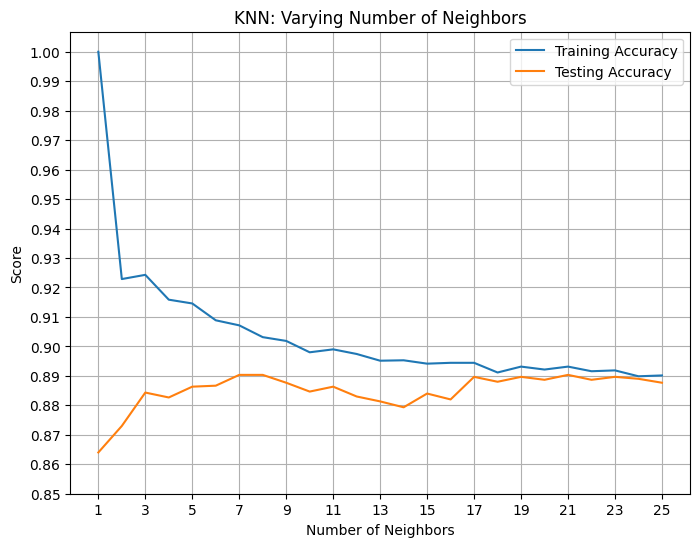

In [134]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
max = 0
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.xticks(np.arange(1, 26, 2))
plt.yticks(np.arange(0.85, 1, 0.01))
plt.grid(True)
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.show()

## Confusion Matrix


TP | FP 
FN | TN 



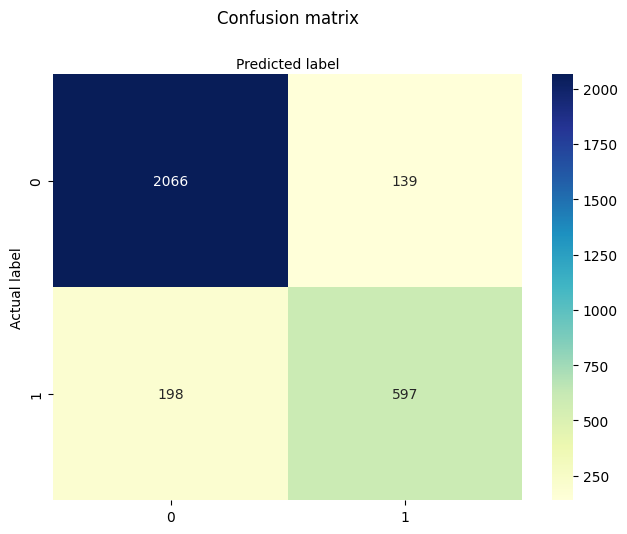

In [135]:
y_predicted = knn.predict(x_test)
y_predicted_proba = knn.predict_proba(x_test)

print("\nTP | FP \nFN | TN \n")
cm1 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm1)

ROC AUC Score: 0.947369186668378


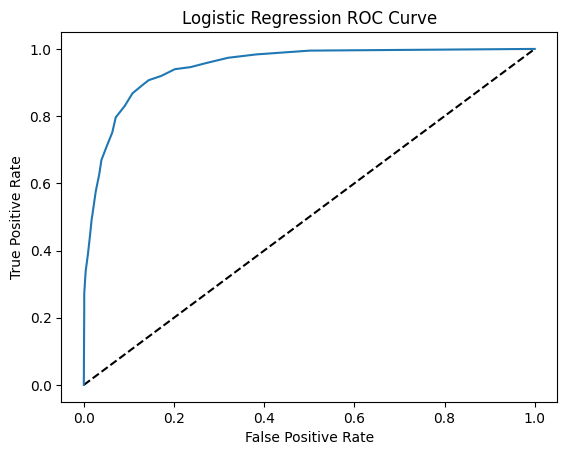

In [137]:
from sklearn.metrics import roc_auc_score
my_roc_auc_score1 = roc_auc_score(y_test, y_predicted_proba[:,1])
print("ROC AUC Score: "+ str(my_roc_auc_score1))
utils.plot_roc_curve(knn,x_test,y_test)

Accuracy = TP+TN / TP+TN+FP+FN
<br>Precision = TP / TP+FP
<br>Recal = TP / TP+FN
<br>F1-score = 2 * (Precision*Recal) / (Precision+Recal)

In [136]:
print("\nClassification Report")
report1 = classification_report(y_test,y_predicted)
print(report1)


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2205
           1       0.81      0.75      0.78       795

    accuracy                           0.89      3000
   macro avg       0.86      0.84      0.85      3000
weighted avg       0.89      0.89      0.89      3000

